In [11]:
import pandas as pd
import numpy as np
import sqlite3


# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [24]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../db.sqlite3")

query1 = "SELECT * FROM restaurant_order"
query2 = "SELECT * FROM restaurant_orderitem"
query3 = "SELECT * FROM restaurant_product"

df1 = pd.read_sql_query(query1, conn)
df2 = pd.read_sql_query(query2, conn)
df3 = pd.read_sql_query(query3, conn)
merged_df = pd.merge(df1, df2, left_on="id", right_on="order_id", how="inner")
df = pd.merge(merged_df, df3, left_on="product_id", right_on="id", how="inner")

df.to_csv("data.csv", index=False)

conn.close()

print(f"Number of rows in the dataframe: {len(df)}")


Number of rows in the dataframe: 74818


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

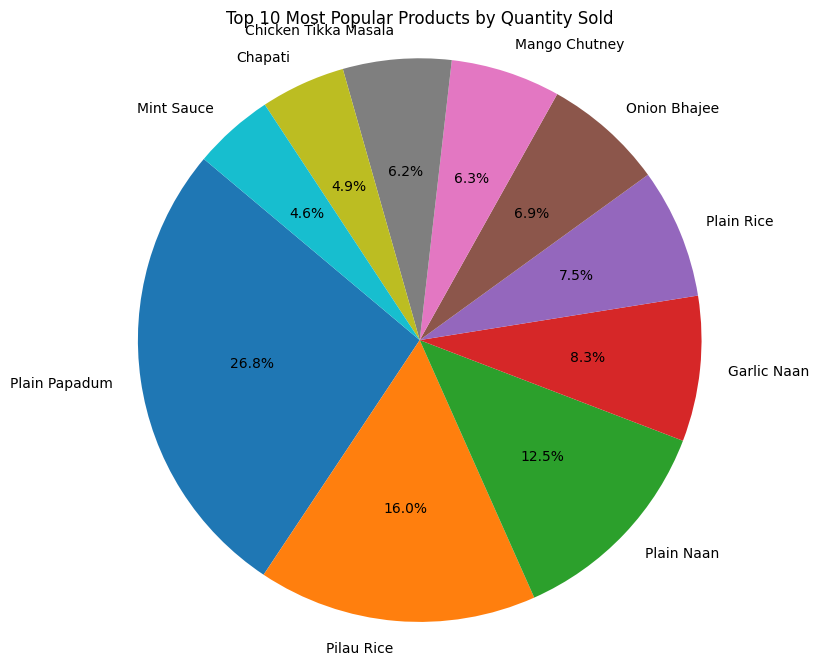

In [25]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('../db.sqlite3')
query = """
SELECT 
    p.name AS product_name,
    SUM(oi.quantity) AS total_quantity_sold
FROM 
    restaurant_orderitem oi
JOIN 
    restaurant_product p ON oi.product_id = p.id
GROUP BY 
    p.name
ORDER BY 
    total_quantity_sold DESC
LIMIT 10;
"""

df = pd.read_sql_query(query, conn)

conn.close()

plt.figure(figsize=(8, 8))
plt.pie(df['total_quantity_sold'], labels=df['product_name'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Popular Products by Quantity Sold')
plt.axis('equal') 
plt.show()


# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

             product_name  item_price
52   Chicken Tikka Masala    22133.35
186            Pilau Rice    18782.65
187            Plain Naan    12955.80
97                  Korma    12261.50
16            Bombay Aloo    10894.45
165          Onion Bhajee    10858.55
20         Butter Chicken    10626.60
81            Garlic Naan     9788.10
98        Korma - Chicken     9764.45
189            Plain Rice     8743.80


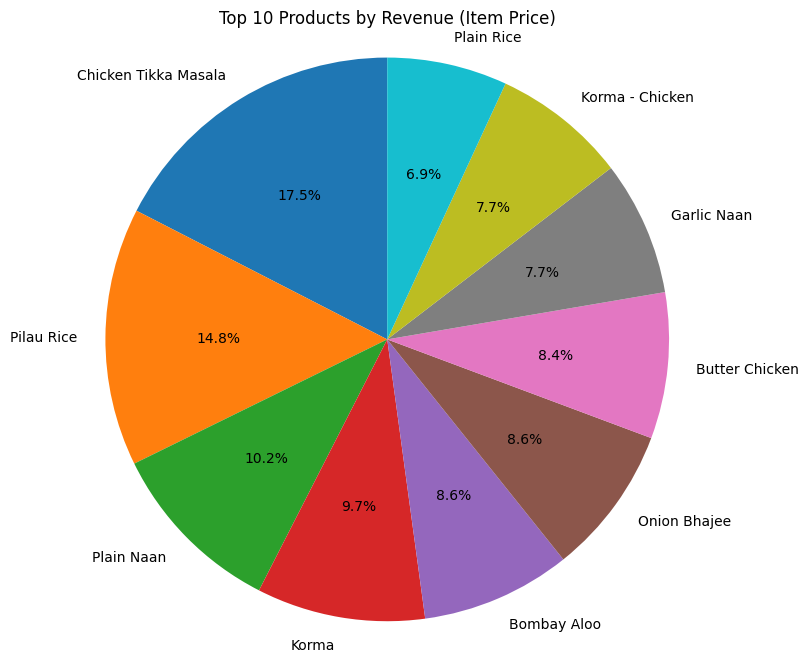

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('../db.sqlite3')

query = """
SELECT 
    p.name AS product_name,
    oi.quantity,
    p.price,
    (oi.quantity * p.price) AS item_price
FROM 
    restaurant_orderitem oi
JOIN 
    restaurant_product p ON oi.product_id = p.id
"""

df = pd.read_sql_query(query, conn)

conn.close()

product_revenue = df.groupby("product_name")["item_price"].sum().reset_index()

top_10_revenue = product_revenue.sort_values(by="item_price", ascending=False).head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10_revenue["item_price"], labels=top_10_revenue["product_name"], autopct="%1.1f%%", startangle=90)
plt.title("Top 10 Products by Revenue (Item Price)")
plt.axis("equal")
print(top_10_revenue)

plt.show()


# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

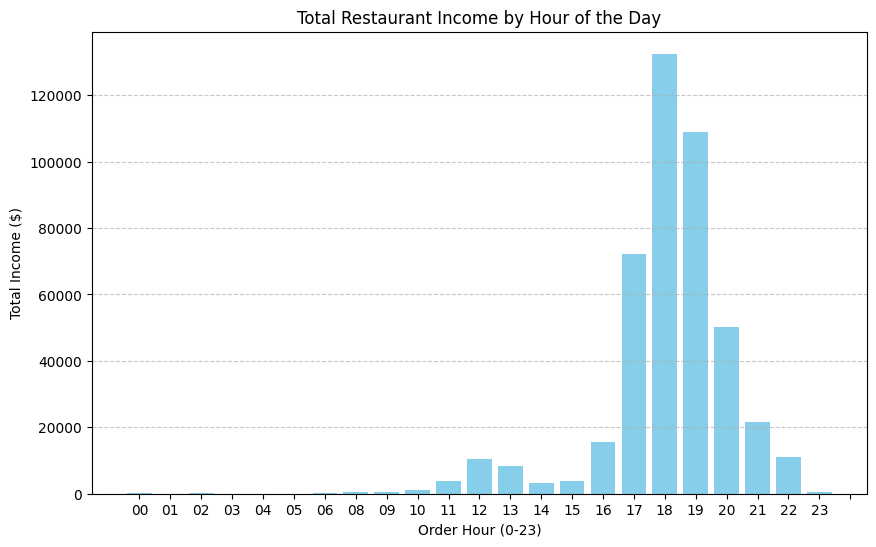

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('../db.sqlite3')

query = """
SELECT 
    strftime('%H', o.datetime) AS order_hour,  -- Extract hour (0 to 23)
    oi.quantity,
    p.price,
    (oi.quantity * p.price) AS item_price
FROM 
    restaurant_order o
JOIN 
    restaurant_orderitem oi ON o.id = oi.order_id
JOIN 
    restaurant_product p ON oi.product_id = p.id
"""

df = pd.read_sql_query(query, conn)

conn.close()

income_by_hour = df.groupby("order_hour")["item_price"].sum().reset_index()

income_by_hour = income_by_hour.sort_values(by="order_hour")
plt.figure(figsize=(10, 6))
plt.bar(income_by_hour["order_hour"], income_by_hour["item_price"], color='skyblue')
plt.xlabel("Order Hour (0-23)")
plt.ylabel("Total Income ($)")
plt.title("Total Restaurant Income by Hour of the Day")
plt.xticks(range(24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

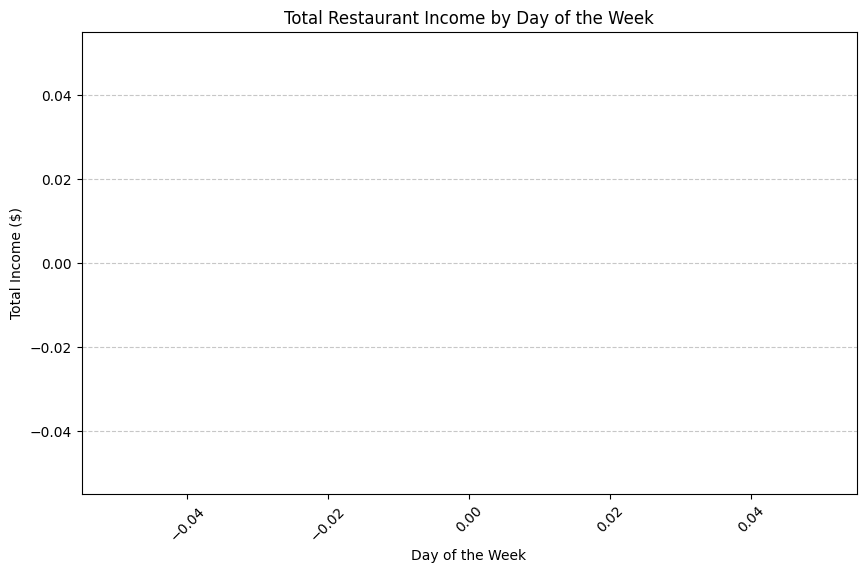

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('../db.sqlite3')


query = """
SELECT 
    strftime('%w', o.datetime) AS order_day_of_week,  -- Extract day of the week (0 to 6)
    oi.quantity,
    p.price,
    (oi.quantity * p.price) AS item_price
FROM 
    restaurant_order o
JOIN 
    restaurant_orderitem oi ON o.id = oi.order_id
JOIN 
    restaurant_product p ON oi.product_id = p.id
"""

df = pd.read_sql_query(query, conn)

conn.close()

income_by_day = df.groupby("order_day_of_week")["item_price"].sum().reset_index()

income_by_day = income_by_day.sort_values(by="order_day_of_week")

income_by_day["order_day_of_week"] = income_by_day["order_day_of_week"].map({
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 
    4: "Friday", 5: "Saturday", 6: "Sunday"
})

plt.figure(figsize=(10, 6))
plt.bar(income_by_day["order_day_of_week"], income_by_day["item_price"], color='skyblue')
plt.xlabel("Day of the Week")
plt.ylabel("Total Income ($)")
plt.title("Total Restaurant Income by Day of the Week")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
